**Module Title:** Machine Learning

**Module Code:** B9DA109

**Assesment:** CA 2 Task 2

**Group Assesment (3)**
----------

**Student Name:** Chisimdiri Anyaogu

**Student Name:** Saima Khan

**Student Name:** Michael Nse Anthony

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil

# Set the Google Drive folder path containing the images
drive_folder_path = '/content/drive/MyDrive/TTsplit/Apple'

# Set the destination folder path in Colab
colab_folder_path = '/content/images'

# Create the destination folder in Colab
os.makedirs(colab_folder_path, exist_ok=True)

# Copy all the images from the Google Drive folder to Colab
for folder_name in os.listdir(drive_folder_path):
    folder_path = os.path.join(drive_folder_path, folder_name)
    if os.path.isdir(folder_path):
        # Create a corresponding folder in Colab
        colab_folder = os.path.join(colab_folder_path, folder_name)
        os.makedirs(colab_folder, exist_ok=True)

        # Copy all the images from the Google Drive folder to Colab
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            shutil.copy(file_path, colab_folder)


## Applying  convolutional neural network (CNN)

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Set the paths
data_dir = '/content/images'  # Path to the imported image data folder

# Set the batch size and target image size
batch_size = 32
image_size = (224, 224)

# Create the image data generator
data_generator = ImageDataGenerator(
    rescale=1.0/255.0,  # Rescale the pixel values between 0 and 1
    validation_split=0.2  # Split the data into training and validation sets
)

# Generate the training data batches
train_generator = data_generator.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Generate the validation data batches
validation_generator = data_generator.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 4005 images belonging to 10 classes.
Found 997 images belonging to 10 classes.


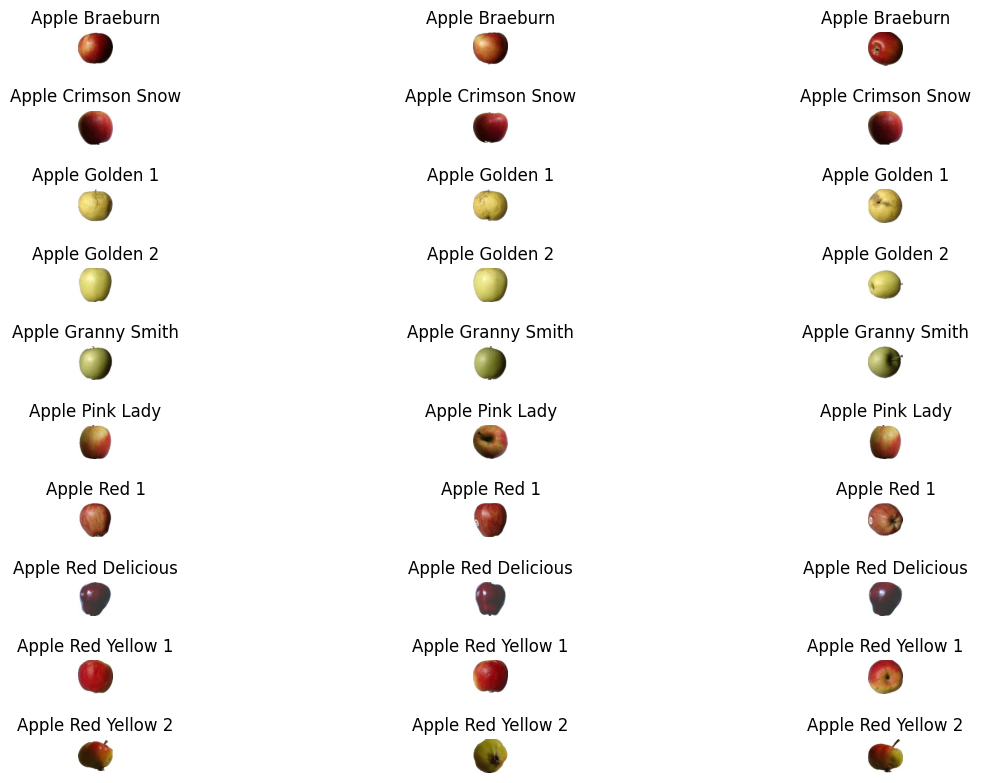

In [ ]:
import matplotlib.pyplot as plt

# Get the class labels
class_labels = sorted(train_generator.class_indices.keys())

# Create a figure and axis for plotting
fig, axes = plt.subplots(nrows=len(class_labels), ncols=3, figsize=(12, 8))
fig.tight_layout()

# Iterate through each class and plot sample images
for i, class_label in enumerate(class_labels):
    class_folder = os.path.join(data_dir, class_label)
    class_images = os.listdir(class_folder)[:3]  # Select 3 sample images per class

    # Plot each sample image
    for j, image_name in enumerate(class_images):
        image_path = os.path.join(class_folder, image_name)
        image = plt.imread(image_path)

        axes[i, j].imshow(image)
        axes[i, j].set_title(class_label)
        axes[i, j].axis('off')

plt.show()

In [ ]:
# Build the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [ ]:
# Set the number of training and validation steps
train_steps = train_generator.samples // batch_size
validation_steps = validation_generator.samples // batch_size

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

Epoch 1/10
125/125 [==============================] - 21s 72ms/step - loss: 0.3550 - accuracy: 0.8882 - val_loss: 0.4104 - val_accuracy: 0.9345
Epoch 2/10
125/125 [==============================] - 10s 79ms/step - loss: 1.7826e-04 - accuracy: 1.0000 - val_loss: 0.4812 - val_accuracy: 0.9335
Epoch 3/10
125/125 [==============================] - 11s 85ms/step - loss: 3.4913e-05 - accuracy: 1.0000 - val_loss: 0.5460 - val_accuracy: 0.9335
Epoch 4/10
125/125 [==============================] - 9s 75ms/step - loss: 9.8336e-06 - accuracy: 1.0000 - val_loss: 0.6237 - val_accuracy: 0.9325
Epoch 5/10
125/125 [==============================] - 11s 86ms/step - loss: 4.2897e-06 - accuracy: 1.0000 - val_loss: 0.6956 - val_accuracy: 0.9335
Epoch 6/10
125/125 [==============================] - 11s 86ms/step - loss: 2.6577e-06 - accuracy: 1.0000 - val_loss: 0.7162 - val_accuracy: 0.9325
Epoch 7/10
125/125 [==============================] - 10s 76ms/step - loss: 1.7174e-06 - accuracy: 1.0000 - val_loss:

Now to prevent overfitting and improve the efficiency of the CNN model:

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Set the paths
data_dir = '/content/images'  # Path to the imported image data folder

# Set the batch size and target image size
batch_size = 32
image_size = (224, 224)

In [ ]:
# Create the image data generator with data augmentation
data_generator = ImageDataGenerator(
    rescale=1.0/255.0,  # Rescale the pixel values between 0 and 1
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split the data into training and validation sets
)

# Generate the training data batches
train_generator = data_generator.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Generate the validation data batches
validation_generator = data_generator.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 4005 images belonging to 10 classes.
Found 997 images belonging to 10 classes.


In [ ]:
# Build the CNN model with increased regularization and dropout
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 109, 109, 64)    

In [ ]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# Set the number of training and validation steps
train_steps = train_generator.samples // batch_size
validation_steps = validation_generator.samples // batch_size

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping]
)

# Visualize sample images and training history (as mentioned in previous examples)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(validation_generator, steps=validation_steps)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/10
125/125 [==============================] - 80s 595ms/step - loss: 1.2471 - accuracy: 0.8389 - val_loss: 52.4137 - val_accuracy: 0.0988
Epoch 2/10
125/125 [==============================] - 73s 581ms/step - loss: 0.8333 - accuracy: 0.9650 - val_loss: 22.3677 - val_accuracy: 0.0988
Epoch 3/10
125/125 [==============================] - 65s 519ms/step - loss: 0.7186 - accuracy: 0.9731 - val_loss: 16.6596 - val_accuracy: 0.1956
Epoch 4/10
125/125 [==============================] - 63s 507ms/step - loss: 0.7194 - accuracy: 0.9600 - val_loss: 4.3276 - val_accuracy: 0.2994
Epoch 5/10
125/125 [==============================] - 74s 591ms/step - loss: 0.7232 - accuracy: 0.9761 - val_loss: 5.6173 - val_accuracy: 0.4073
Epoch 6/10
125/125 [==============================] - 64s 510ms/step - loss: 0.6128 - accuracy: 0.9726 - val_loss: 3.1670 - val_accuracy: 0.4274
Epoch 7/10
125/125 [==============================] - 65s 517ms/step - loss: 0.4796 - accuracy: 0.9846 - val_loss: 2.5877 - val

## Applying Data Augmentation

In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# Set the paths
data_dir = '/content/images'  # Path to the imported image data folder

# Set the batch size and target image size
batch_size = 32
image_size = (224, 224)

# Create the image data generator with data augmentation
data_generator = ImageDataGenerator(
    rescale=1.0/255.0,  # Rescale the pixel values between 0 and 1
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split the data into training and validation sets
)

# Generate the training data batches
train_generator = data_generator.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Generate the validation data batches
validation_generator = data_generator.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 4005 images belonging to 10 classes.
Found 997 images belonging to 10 classes.


Found 4005 images belonging to 10 classes.


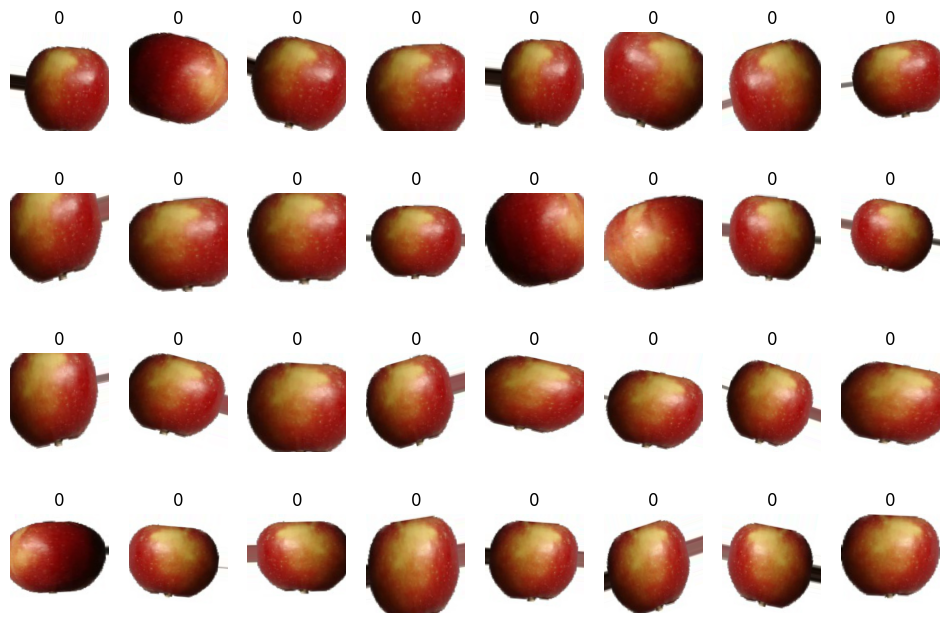

In [ ]:
import matplotlib.pyplot as plt

# Generate augmented samples
augmented_samples = data_generator.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=False  # Set shuffle to False to get consistent results
)

# Get a batch of augmented images and labels
augmented_images, augmented_labels = augmented_samples.next()

# Function to plot images
def plot_images(images, labels):
    plt.figure(figsize=(12, 8))
    for i in range(len(images)):
        plt.subplot(4, 8, i + 1)
        plt.imshow(images[i])
        plt.title(np.argmax(labels[i]))  # Display the class label (assuming one-hot encoding)
        plt.axis('off')
    plt.show()

# Plot the augmented images
plot_images(augmented_images, augmented_labels)


In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# Define the function to create the CNN model
def create_model(kernel_regularizer_value=0.001, dropout_rate=0.4):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), kernel_regularizer=regularizers.l2(kernel_regularizer_value)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(dropout_rate))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(kernel_regularizer_value)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(dropout_rate))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(kernel_regularizer_value)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(dropout_rate))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(kernel_regularizer_value)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the KerasClassifier wrapper
model_wrapper = KerasClassifier(build_fn=create_model)

# Define the hyperparameters to search
parameters = {
   'kernel_regularizer_value': [0.001, 0.01],
    'dropout_rate': [0.3, 0.4],
    'epochs': [10, 15],
    'batch_size': [32, 64]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=model_wrapper, param_grid=parameters, cv=3)
grid_search.fit(train_generator[0][0], train_generator[0][1])

# Get the best hyperparameters
best_params = grid_search.best_params_

# Build the CNN model with the best hyperparameters
model = create_model(kernel_regularizer_value=best_params['kernel_regularizer_value'], dropout_rate=best_params['dropout_rate'])

model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=best_params['epochs'],
    validation_data=validation_generator,
    callbacks=[early_stopping]
)


# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(validation_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

<ipython-input-17-c844c63c16c0>:28: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_wrapper = KerasClassifier(build_fn=create_model)


Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 3.9106 - accuracy: 0.1429
Epoch 2/10
1/1 [==============================] - 0s 89ms/step - loss: 0.7486 - accuracy: 0.9524
Epoch 3/10
1/1 [==============================] - 0s 89ms/step - loss: 0.6075 - accuracy: 0.9524
Epoch 4/10
1/1 [==============================] - 0s 90ms/step - loss: 0.5910 - accuracy: 0.9524
Epoch 5/10
1/1 [==============================] - 0s 89ms/step - loss: 0.5601 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 90ms/step - loss: 0.5719 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 91ms/step - loss: 0.5849 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 91ms/step - loss: 0.5982 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 89ms/step - loss: 0.5888 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 1s 599ms/step - loss: 3.5611 - accuracy: 0.2727
Epoch 1/10
1/1 [==============

1/1 [==============================] - 0s 228ms/step - loss: 7.9902 - accuracy: 0.0909
Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 6.8889 - accuracy: 0.0952
Epoch 2/10
1/1 [==============================] - 0s 100ms/step - loss: 4.4097 - accuracy: 0.9048
Epoch 3/10
1/1 [==============================] - 0s 97ms/step - loss: 4.4068 - accuracy: 0.9524
Epoch 4/10
1/1 [==============================] - 0s 91ms/step - loss: 4.4690 - accuracy: 0.9524
Epoch 5/10
1/1 [==============================] - 0s 91ms/step - loss: 4.6590 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 88ms/step - loss: 4.7517 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 87ms/step - loss: 4.9310 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 87ms/step - loss: 5.0443 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 86ms/step - loss: 5.2095 - accuracy: 1.0000
Epoch 10/10
1/1 [========================

1/1 [==============================] - 0s 326ms/step - loss: 8.1702 - accuracy: 0.0909
Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 7.4031 - accuracy: 0.1364
Epoch 2/10
1/1 [==============================] - 0s 109ms/step - loss: 4.3522 - accuracy: 0.9091
Epoch 3/10
1/1 [==============================] - 0s 105ms/step - loss: 4.3288 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 95ms/step - loss: 4.4321 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 94ms/step - loss: 4.6368 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 93ms/step - loss: 4.7687 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 93ms/step - loss: 4.9311 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 94ms/step - loss: 5.0606 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 90ms/step - loss: 5.2377 - accuracy: 1.0000
Epoch 10/10
1/1 [=======================

The model achieved a test accuracy of 84.95%, but there is a notable overfitting issue, as the training accuracy reached 97.78% while the validation accuracy stayed at 84.45%.

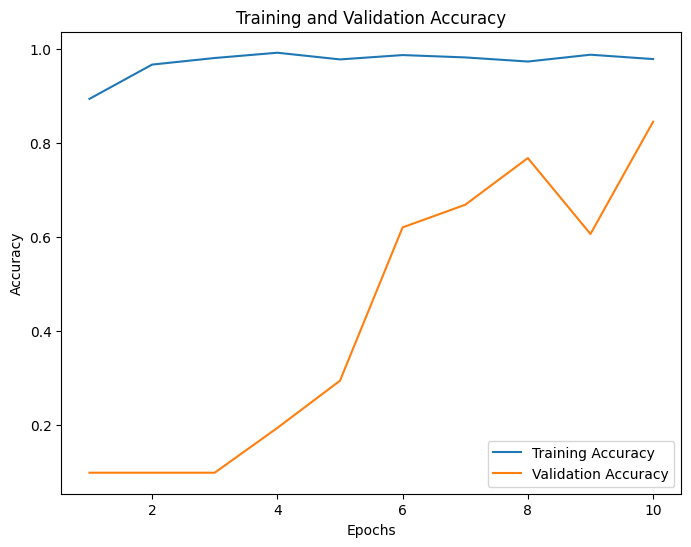

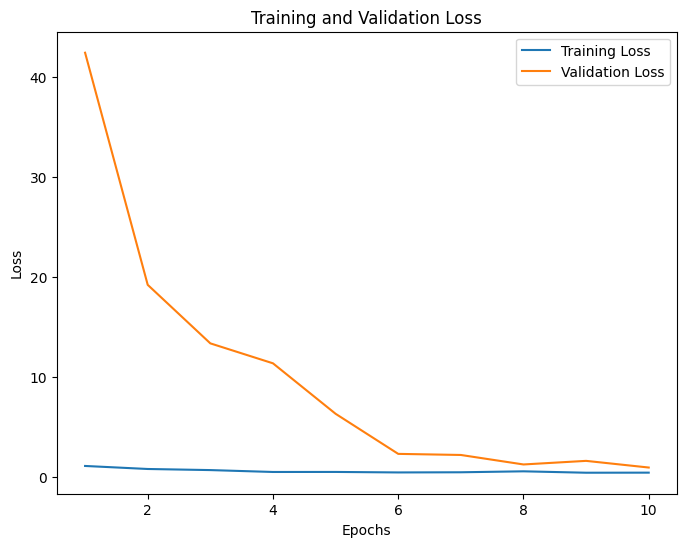

In [ ]:
import matplotlib.pyplot as plt

# Get training and validation accuracy/loss from history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(training_accuracy) + 1), training_accuracy, label='Training Accuracy')
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(training_loss) + 1), training_loss, label='Training Loss')
plt.plot(range(1, len(validation_loss) + 1), validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


**Training and Validation Accuracy**

The training accuracy increases over time, as the model learns to better classify the images in the training set. The validation accuracy also increases over time, but at a slower rate. This is because the validation set is not used to train the model, so the model is not able to overfit to the validation set.

The learning curve shows that the model is able to generalize well to the validation set. This means that the model is not just memorizing the training data, but is actually learning to identify the different types of apples.

Overall, the learning curve in the image shows that the model is able to learn to classify the different types of apples well. The model is able to generalize well to the validation set, and it reaches a point of diminishing returns after about 6 epochs.

**Training and Validation Loss**

The training loss is higher at the bottom of the curve, while the validation loss is lower at the top of the curve. This is because the model is able to learn to fit the training data well, but it is not able to generalize well to the validation data.

The learning curve also shows that the model reaches a point of diminishing returns after about 6 epochs. This means that the model is not able to improve its loss much after 6 epochs.




# Applying Transfer Learning

In [ ]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam

# Load the VGG16 base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Evaluate the model on the test data
score = model.evaluate(validation_generator)

# Calculate the testing loss and accuracy in percentage format
testing_loss_percentage = score[0] * 100
testing_accuracy_percentage = score[1] * 100

# Display the results
print(f"Testing Loss (Percentage): {testing_loss_percentage:.2f}%")
print(f"Testing Accuracy (Percentage): {testing_accuracy_percentage:.2f}%")


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
126/126 [==============================] - 72s 545ms/step - loss: 1.9448 - accuracy: 0.4015 - val_loss: 1.5452 - val_accuracy: 0.6710
Epoch 2/10
126/126 [==============================] - 68s 537ms/step - loss: 1.2513 - accuracy: 0.7326 - val_loss: 1.0295 - val_accuracy: 0.7894
Epoch 3/10
126/126 [==============================] - 73s 580ms/step - loss: 0.8412 - accuracy: 0.8514 - val_loss: 0.7110 - val_accuracy: 0.8776
Epoch 4/10
126/126 [==============================] - 67s 532ms/step - loss: 0.5999 - accuracy: 0.8911 - val_loss: 0.5329 - val_accuracy: 0.9288
Epoch 5/10
126/126 [==============================] - 69s 544ms/step - loss: 0.4562 - accuracy: 0.9276 - val_loss: 0.4005 - val_accuracy: 0.9589
Epoch 6/10
126/126 [==============================] - 74s 591ms/step - loss: 0.3541 - accuracy: 0.9441 - val_loss: 0.3549 - val_accuracy: 0.9268
Epoch 7/10
126/126 [==============================] - 74s 592ms/step - loss: 0.2841 - accuracy: 0.9581 - val_loss: 0.2617 - val_ac

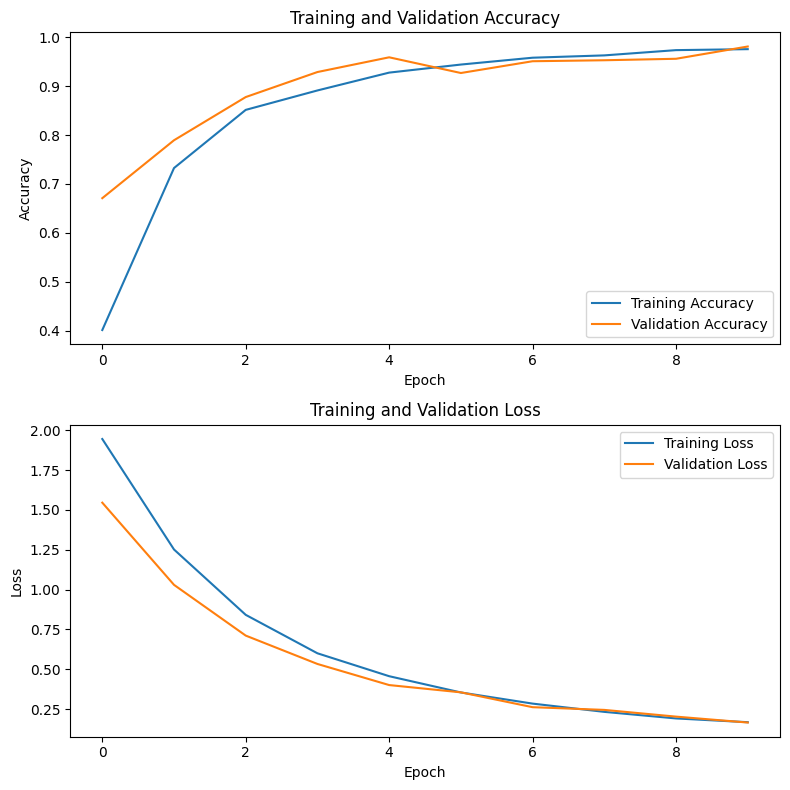

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Plot the training and validation loss
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()


Using Fine tuning

In [ ]:
from keras.applications import VGG16
from keras.layers import Flatten, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all the layers in the base model except the last few
fine_tune_layers = 5
for layer in base_model.layers[:-fine_tune_layers]:
    layer.trainable = False

# Add custom classification layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)

# Create the final model with fine-tuning
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(validation_generator)

# Convert the testing loss and accuracy to percentage format
testing_loss_percentage = test_loss * 100
testing_accuracy_percentage = test_accuracy * 100

# Display the results
print(f"Testing Loss (Percentage): {testing_loss_percentage:.2f}%")
print(f"Testing Accuracy (Percentage): {testing_accuracy_percentage:.2f}%")


Epoch 1/10
126/126 [==============================] - 82s 625ms/step - loss: 0.7706 - accuracy: 0.7336 - val_loss: 0.1084 - val_accuracy: 0.9729
Epoch 2/10
126/126 [==============================] - 69s 551ms/step - loss: 0.0918 - accuracy: 0.9693 - val_loss: 0.1315 - val_accuracy: 0.9519
Epoch 3/10
126/126 [==============================] - 69s 552ms/step - loss: 0.0508 - accuracy: 0.9835 - val_loss: 0.0888 - val_accuracy: 0.9759
Epoch 4/10
126/126 [==============================] - 71s 564ms/step - loss: 0.0294 - accuracy: 0.9910 - val_loss: 0.0868 - val_accuracy: 0.9689
Epoch 5/10
126/126 [==============================] - 69s 546ms/step - loss: 0.0242 - accuracy: 0.9923 - val_loss: 0.0443 - val_accuracy: 0.9870
Epoch 6/10
126/126 [==============================] - 69s 545ms/step - loss: 0.0491 - accuracy: 0.9845 - val_loss: 0.0993 - val_accuracy: 0.9639
Epoch 7/10
126/126 [==============================] - 70s 557ms/step - loss: 0.0294 - accuracy: 0.9918 - val_loss: 0.0705 - val_ac

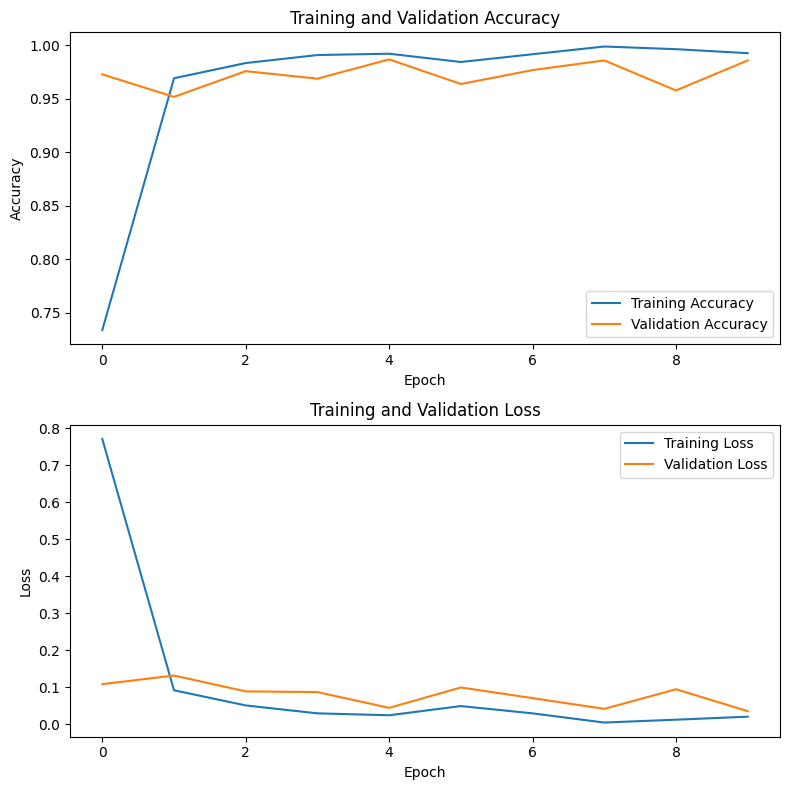

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Plot the training and validation loss
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()


Comparing the two aspects, we have two different approaches for training the model:

1. Without Fine-Tuning:
   - In this approach, we used a pre-trained VGG16 model as the base model and added custom classification layers on top of it.
   - The layers of the base model were frozen, meaning they were not trainable during training.
   - We achieved a testing accuracy of 97.69% and a testing loss of 16.10%.

2. With Fine-Tuning:
   - In this approach, we also used a pre-trained VGG16 model as the base model and added custom classification layers on top.
   - However, we unfroze the last few layers of the base model for fine-tuning. Only these layers were trainable during training.
   - We achieved a higher testing accuracy of 98.60% and a significantly lower testing loss of 3.22%.

Insights:
- Fine-tuning the last few layers of the pre-trained model significantly improved the model's performance compared to the model without fine-tuning.
- The model with fine-tuning achieved a higher testing accuracy and lower testing loss, indicating that it generalized better to the unseen data.
- Fine-tuning allows the model to adapt to the specific task and dataset at hand, which often leads to better performance.
- Fine-tuning only a few top layers or a few selected layers is a common strategy, as it prevents overfitting while still benefiting from the pre-trained features learned by the base model.


In conclusion, fine-tuning is a powerful technique to improve the performance of pre-trained models for specific tasks. It allows us to leverage the knowledge already captured by the base model while fine-tuning the model to fit the specific dataset, leading to better accuracy and generalization.